In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("../data/raw/fake_job_postings.csv")


In [4]:
# Drop columns that are unnecessary or identifiers
df.drop(['job_id', 'telecommuting', 'has_company_logo', 'has_questions',
         'salary_range', 'company_profile', 'benefits'], axis=1, inplace=True)

df.shape


(17880, 11)

In [5]:
# Check missing values
df.isnull().sum()

# Fill missing text with empty string
text_cols = ['title', 'location', 'department', 'description', 'requirements']
for col in text_cols:
    df[col] = df[col].fillna("")

# Drop rows where target or critical features are missing
df.dropna(subset=['fraudulent'], inplace=True)


In [6]:
# Target: 0 = real, 1 = fake
df['fraudulent'] = df['fraudulent'].astype(int)
df['fraudulent'].value_counts()


fraudulent
0    17014
1      866
Name: count, dtype: int64

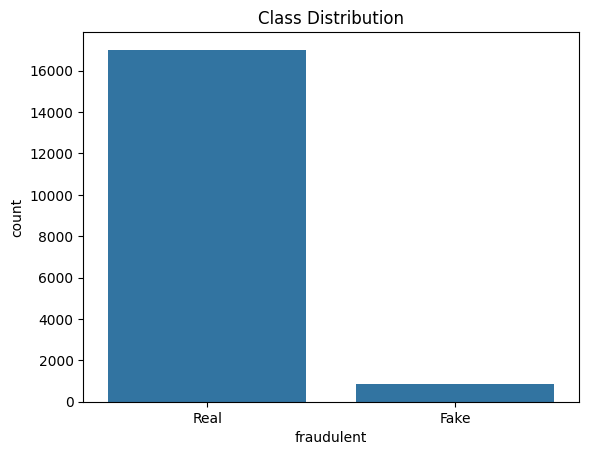

In [7]:
sns.countplot(data=df, x='fraudulent')
plt.title("Class Distribution")
plt.xticks([0,1], ['Real', 'Fake'])
plt.show()


In [8]:
df.to_csv("../data/processed/cleaned_data.csv", index=False)
print("✅ Cleaned data saved!")


✅ Cleaned data saved!
